- Muhammad Rizki Achirlita
- muh.rizkiachirlita@gmail.com

### Load Dataset

In [42]:
# Basic package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
url = 'https://raw.githubusercontent.com/rizkiachr/Clustering-segmentasi-berat-tinggi/main/berat_tinggi.csv'
df = pd.read_csv(url)

In [44]:
# Cuplikan data
df.sample(5)

,tinggi,berat,deskripsi
1877,158.012902,57.635935,Normal
7544,154.852428,58.301706,Normal
8766,148.508986,85.174216,Obese
4975,178.007755,70.244959,Slim
1045,189.037408,66.914687,Slim


### Exploratory Data Analysis (EDA)

In [4]:
df.info()

# Tidak ada masalah pada tipe data & null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tinggi     8888 non-null   float64
 1   berat      8888 non-null   float64
 2   deskripsi  8888 non-null   object 
dtypes: float64(2), object(1)
memory usage: 208.4+ KB


In [5]:
df_drop = df.drop(['deskripsi'], axis=1)
df_drop.duplicated().any()

# Tidak ada data duplikat

False

In [6]:
cats = ['deskripsi']
nums = ['tinggi', 'berat']

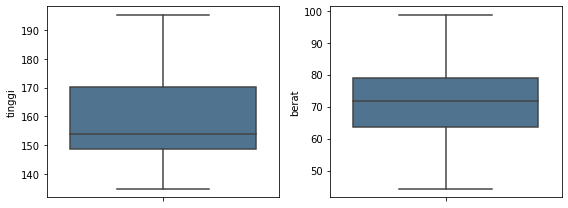

In [7]:
plt.figure(figsize=(8,3))
for i in range(0, len(nums)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[nums[i]], color="#467599")
    plt.tight_layout()


# Tidak ada outliers

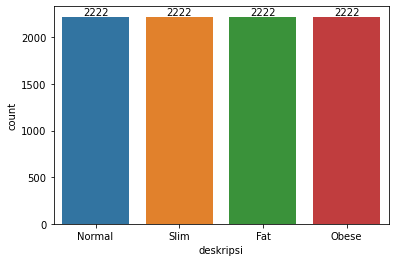

In [8]:
ax = sns.countplot(x=df['deskripsi'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Semua value bernilai sama persis, yaitu 2222

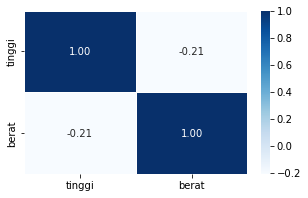

In [9]:
plt.figure(figsize=(5, 3))
sns.heatmap(df_drop.corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

# Bebas Multikolinearitas

#### EDA Sumarry
- Tidak ada masalah pada tipe data & null
- Tidak ada data duplikat
- Tidak ada outliers
- Semua value di kolom kategori bernilai sama persis
- Semua feature bebas multikolinearitas

Sehingga dapat diambil keputusan, karena salah satu hal yang wajib dilakukan sebelum Clustering adalah melakukan Standardisasi. Maka, Preprocessing yang akan dilakukan hanyalah Standardisasi 

### Data Preprocessing

In [10]:
features = ['berat', 'tinggi']
x = df[features].values
y = df['deskripsi'].values

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

new_df = pd.DataFrame(data = x_std, columns = features)
new_df.describe()

,berat,tinggi
count,8.888000e+03,8.888000e+03
mean,2.233437e-17,2.524608e-16
std,1.000056e+00,1.000056e+00
min,-2.518583e+00,-1.700452e+00
25%,-7.278008e-01,-7.436739e-01
50%,3.573103e-02,-3.731224e-01
75%,7.119833e-01,7.883579e-01
max,2.542716e+00,2.532521e+00


### Modeling - Unsupervised Learning

In [12]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(new_df.values)

AgglomerativeClustering(n_clusters=4)

In [21]:
new_df['target'] = y
new_df['fit'] = ac.labels_

<AxesSubplot:xlabel='berat', ylabel='tinggi'>

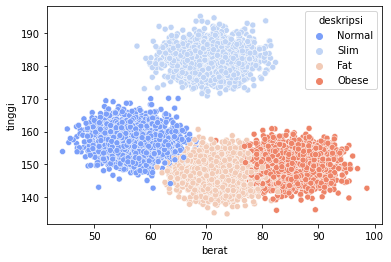

In [32]:
# Data awal divisualisasikan dengan Scaterplot
sns.scatterplot(data=df, x='berat', y='tinggi', palette='coolwarm',
                hue='deskripsi')

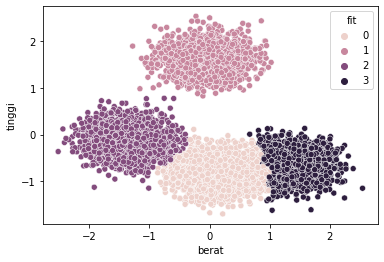

In [34]:
# Data yang telah diolah menggunakan algoritma Agglomerative Clustering
sns.scatterplot(data=new_df, x='berat', y='tinggi', 
                hue='fit');

### Hasil

Clustering adalah salah satu bentuk implementasi Machine Learning tipe Unsupervised Learning (UL). Output UL sendiri bertujuan untuk "memisahkan" data menjadi segmentasi tertentu berdasarkan feature yang sudah ada. 

Dalam task kali ini, saya menerapkan algoritma Agglomerative Clustering untuk memisahkan data berat dan tinggi menjadi segmentasi tertentu (hasilnya: 0,1,2,3). Saya sengaja menggunakan data sederhana yang sudah ada Output-nya, sehingga kualitas olahan Machine Learning dapat dibandingkan secara real.

Kesimpulan:
Target yang menggunakan Machine Learning dan tidak menggunakan Machine Learning memiliki kemiripan yang sangat identik. Hanya saja, pada target yang belum memakai Machine Learning terdapat datapoint yang berada di Cluster berbeda. Hal ini saya maklumi, kemungkinan hal itu terjadi karena staff input data yang bertugas cenderung Subjektif karena melihat secara langsung tubuh orang tersebut. Sementara output yang menggunakan Machine Learning lebih objektif karena tidak mempertimbangkan bentuk tubuh individu tersebut.